In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [203]:
titanic = sns.load_dataset("titanic")
sns.set_style('whitegrid')

In [204]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [205]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [206]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


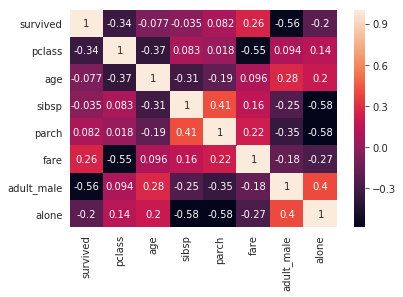

In [207]:
sns.heatmap(titanic.corr(),annot=True)

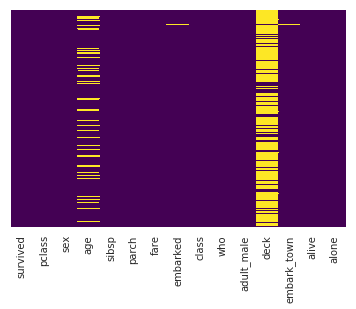

In [208]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

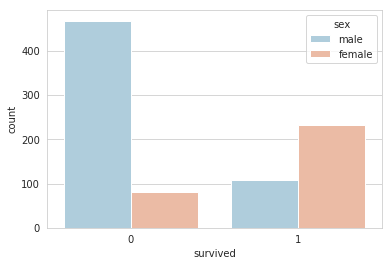

In [209]:
sns.countplot(x='survived',hue='sex',data=titanic,palette='RdBu_r')

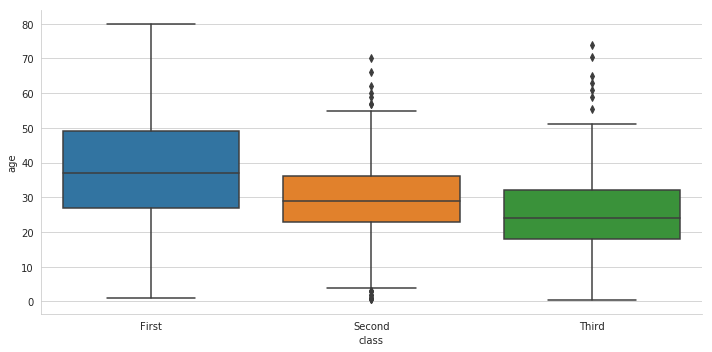

In [210]:
sns.catplot(x='class',y='age',data=titanic,kind='box',aspect=2)

In [211]:
titanic[titanic['class']=='First']['age'].mean()

38.233440860215055

In [212]:
titanic[titanic['class']=='Second']['age'].mean()

29.87763005780347

In [213]:
titanic[titanic['class']=='Third']['age'].mean()

25.14061971830986

In [214]:
def fAge(col):
    age = col[0]
    pclass = col[0]
    if pd.isnull(age):
        if pclass == 'First':
            return 38
        elif pclass == 'Second':
            return 29
        else:
            return 25
    else:
        return age

In [215]:
titanic['age'] = titanic[['age','class']].apply(fAge,axis=1)

In [216]:
titanic.dropna(inplace=True)

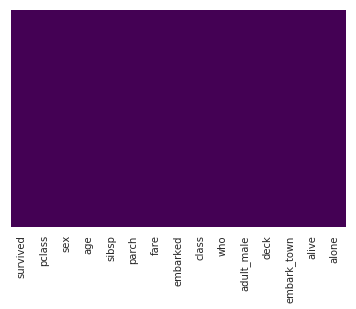

In [217]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [218]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [219]:
titanic.drop(['who','alive'],axis=1,inplace=True)

In [220]:
titanic.drop(['class'],axis=1,inplace=True)

In [221]:
titanic.drop(['alone'],axis=1,inplace=True)
titanic.drop(['adult_male'],axis=1,inplace=True)

In [222]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town
1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg
3,1,1,female,35.0,1,0,53.1000,S,C,Southampton
6,0,1,male,54.0,0,0,51.8625,S,E,Southampton
10,1,3,female,4.0,1,1,16.7000,S,G,Southampton
11,1,1,female,58.0,0,0,26.5500,S,C,Southampton


In [223]:
gen_dum = pd.get_dummies(titanic['sex'])


In [224]:
merge = pd.concat([titanic,gen_dum],axis=1)

In [225]:
merge.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,female,male
1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg,1,0
3,1,1,female,35.0,1,0,53.1000,S,C,Southampton,1,0
6,0,1,male,54.0,0,0,51.8625,S,E,Southampton,0,1
10,1,3,female,4.0,1,1,16.7000,S,G,Southampton,1,0
11,1,1,female,58.0,0,0,26.5500,S,C,Southampton,1,0


In [226]:
merge.drop(['sex','male'],axis=1,inplace=True)

In [227]:
merge.head()

,survived,pclass,age,sibsp,parch,fare,embarked,deck,embark_town,female
1,1,1,38.0,1,0,71.2833,C,C,Cherbourg,1
3,1,1,35.0,1,0,53.1000,S,C,Southampton,1
6,0,1,54.0,0,0,51.8625,S,E,Southampton,0
10,1,3,4.0,1,1,16.7000,S,G,Southampton,1
11,1,1,58.0,0,0,26.5500,S,C,Southampton,1


In [228]:
lb = preprocessing.LabelEncoder()

In [229]:
merge['embarked'] = lb.fit_transform(merge['embarked'])
merge['deck'] = lb.fit_transform(merge['deck'])
merge['embark_town'] = lb.fit_transform(merge['embark_town'])

In [230]:
merge.head()

,survived,pclass,age,sibsp,parch,fare,embarked,deck,embark_town,female
1,1,1,38.0,1,0,71.2833,0,2,0,1
3,1,1,35.0,1,0,53.1000,2,2,2,1
6,0,1,54.0,0,0,51.8625,2,4,2,0
10,1,3,4.0,1,1,16.7000,2,6,2,1
11,1,1,58.0,0,0,26.5500,2,2,2,1


In [231]:
merge.reset_index(inplace=True)
merge.head()

,index,survived,pclass,age,sibsp,parch,fare,embarked,deck,embark_town,female
0,1,1,1,38.0,1,0,71.2833,0,2,0,1
1,3,1,1,35.0,1,0,53.1000,2,2,2,1
2,6,0,1,54.0,0,0,51.8625,2,4,2,0
3,10,1,3,4.0,1,1,16.7000,2,6,2,1
4,11,1,1,58.0,0,0,26.5500,2,2,2,1


In [232]:
merge.drop(['index'],axis=1,inplace=True)
merge.head()

,survived,pclass,age,sibsp,parch,fare,embarked,deck,embark_town,female
0,1,1,38.0,1,0,71.2833,0,2,0,1
1,1,1,35.0,1,0,53.1000,2,2,2,1
2,0,1,54.0,0,0,51.8625,2,4,2,0
3,1,3,4.0,1,1,16.7000,2,6,2,1
4,1,1,58.0,0,0,26.5500,2,2,2,1


In [233]:
final = merge

In [234]:
X = final.drop('survived',axis=1)
y = final['survived']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [236]:
lgmod = LogisticRegression()

In [237]:
lgmod.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [239]:
lgmod.score(X_test,y_test)

0.7704918032786885

In [240]:
prediction = lgmod.predict(X_test)

In [265]:
lgmod.predict([[2,38,1,0,71.2833,0,6,0,0]])

array([1])

In [241]:
prediction

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [245]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [246]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       0.89      0.76      0.82        41

   micro avg       0.77      0.77      0.77        61
   macro avg       0.75      0.78      0.76        61
weighted avg       0.80      0.77      0.78        61



In [249]:
cm = confusion_matrix(y_test,prediction)

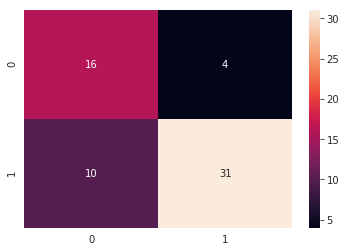

In [250]:
sns.heatmap(cm,annot=True)